**Code pour étudier la stabilité des modèles.** \
Pour des paramètres fixés, 10 modèles sont entraînés qui diffèrent seulement par un shuffle de corpus d'entraînement. Pour chacun de ces modèles, on regarde l'ensemble des 10 mots les plus proches de femmes. On fait ensuite l'intersection de ces 10 modèles. Plus le nombre de mots dans l'intersection est proche de 10, plus le modèle avec les paramètres fixés est stable. 

_Corpus avec bible_

In [9]:
#!/usr/bin/env python3
# coding=utf-8
import sys
from gensim.models import KeyedVectors
from copy import copy
from itertools import product
import os


femmes = []
hommes = []
for i in range(10):
    ifilename = f"models-trained-bible-001/run-G{i:03d}W005V353E002000.word2vec"
    if not os.path.exists(ifilename):
        print('pas trouvé')
        continue
    wv = KeyedVectors.load(ifilename)
    femmes.append({x[0] for x in wv.most_similar("FEMME", topn=10)})
    hommes.append({x[0] for x in wv.most_similar("HOMME", topn=10)})

print(femmes)
print(hommes)
if len(femmes) > 0:
    #print(f"run-G{i:03d}W005V353E002000 "+"="*20+"femme similarity"+"="*20)
    c = copy(femmes[0])
    for x in femmes:
        c &= x
    print(f"femme={c}")


print()
if len(hommes) > 0:
    #print(f"run-G{i:03d}W005V353E002000 "+"="*20+"homme similarity"+"="*20)
    c = copy(hommes[0])
    for x in hommes:
        c &= x
    print(f"homme={c}")

[{'nourrice', 'princesse', 'servante', 'veuve', 'prostituee', 'epouse', 'mariee', 'soeur', 'poulette', 'fille'}, {'accouche', 'nourrice', 'princesse', 'servante', 'mari', 'epouse', 'soeur', 'concubine', 'fille', 'compagne'}, {'nourrice', 'prostituee', 'maitresse', 'mari', 'veuve', 'servante', 'epouse', 'soeur', 'concubine', 'fille'}, {'accouche', 'mikal', 'nourrice', 'bru', 'princesse', 'servante', 'mari', 'epouse', 'concubine', 'fille'}, {'mikal', 'nourrice', 'bru', 'princesse', 'servante', 'mari', 'veuve', 'anna', 'epouse', 'fille'}, {'poulette', 'nourrice', 'princesse', 'mari', 'mariee', 'azuba', 'concubine', 'ragouel', 'fille', 'devoyee'}, {'mikal', 'nourrice', 'bru', 'prostituee', 'servante', 'princesse', 'maitresse', 'epouse', 'concubine', 'fille'}, {'accouche', 'nourrice', 'amant', 'princesse', 'maitresse', 'marier', 'epouse', 'mariee', 'concubine', 'fille'}, {'virginite', 'nourrice', 'princesse', 'servante', 'maitresse', 'epouse', 'soeur', 'azuba', 'concubine', 'fille'}, {'acco

In [10]:
import matplotlib.pyplot as plt

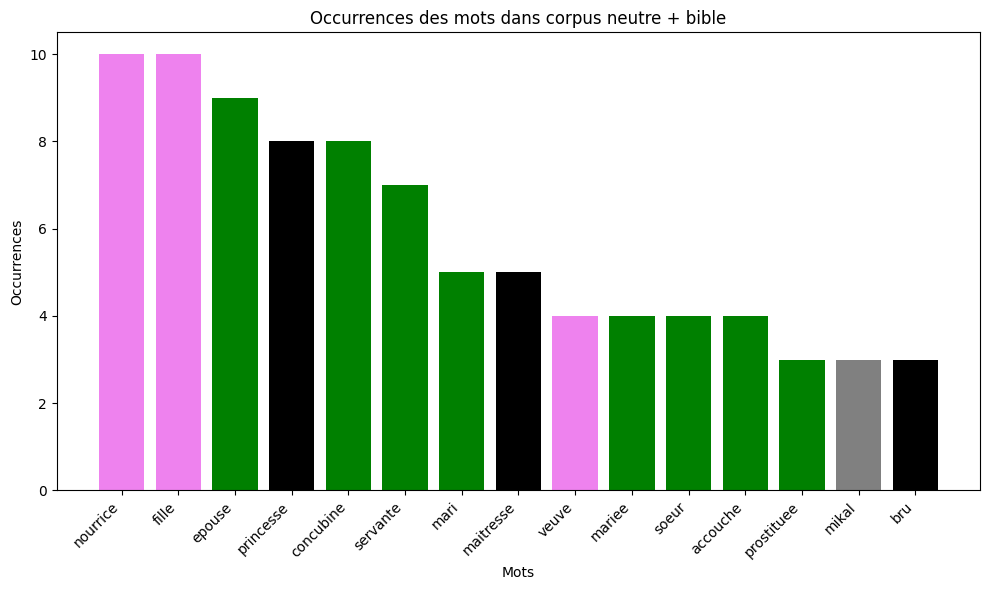

In [12]:
# Initialiser le dictionnaire pour stocker les occurrences
occurrences = {}

# Calculer les occurrences de chaque mot
for liste_mots in femmes:
    for mot in liste_mots:
        occurrences[mot] = occurrences.get(mot, 0) + 1


# Filtrer les mots ayant plus de 3 occurrences
occurrences_filtrees = {mot: occurrence for mot, occurrence in occurrences.items() if occurrence > 2}

# Trier les mots par nombre d'occurrences
occurrences_filtrees = dict(sorted(occurrences_filtrees.items(), key=lambda item: item[1], reverse=True))


# Extraire les mots et leurs occurrences
mots = list(occurrences_filtrees.keys())
occurrences = list(occurrences_filtrees.values())

#code couleur 
mots_vert = ['mariee', 'servante', 'soeur', 'mere', 'mari', 'concubine', 'epouse', 'accouche', 'prostituee']
mots_bleu = ['nourrice', 'fille', 'veuve']
mots_noirs = ['maitresse', 'bru', 'princesse']

# Créer une liste de couleurs pour les barres
couleurs = ['green' if mot in mots_vert else 'violet' if mot in mots_bleu else 'black' if mot in mots_noirs else 'gray' for mot in mots]

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(range(len(mots)), occurrences, align='center', color = couleurs)
plt.xticks(range(len(mots)), mots, rotation=45, ha='right')
plt.xlabel('Mots')
plt.ylabel('Occurrences')
plt.title('Occurrences des mots dans corpus neutre + bible')
plt.tight_layout()
plt.show()